## Jax

Jax is a ML library.
It can do automatic differentiation and run accelerated tensor operations at GPU/TPU.

Installation (just CPU version, because GPU/TPU is more involved):
```shell
pip install 'jax[cpu]'
```

In [15]:
import jax.numpy as jnp
from jax import grad, jit, vmap
import jax.random
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def random(shape):
    key = jax.random.PRNGKey(0)
    return jax.random.normal(key, shape)


random((3, 2))

DeviceArray([[ 0.18784384, -1.2833426 ],
             [ 0.6494181 ,  1.2490594 ],
             [ 0.24447003, -0.11744965]], dtype=float32)

DeviceArray is an array (duh) that lives on some device (duh). Device is CPU/GPU/TPU/etc.

In [12]:
# jax.numpy provides numpy-compatible api
jnp.arange(10)

DeviceArray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

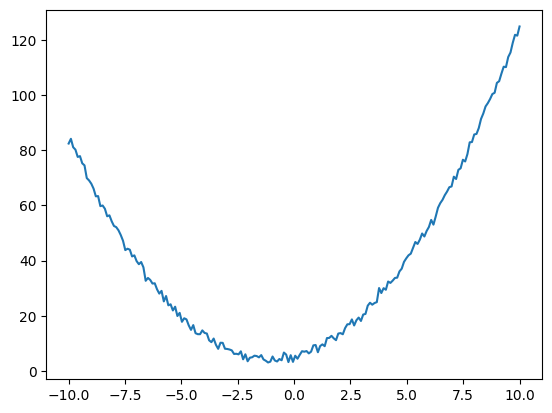

In [17]:
def gen_kinda_quadratic_data():
    xs = jnp.linspace(-10.0, 10.0, 200)  # like numpy.linspace
    ys = xs ** 2 + 2 * xs + 5 + random((200,))
    return xs, ys


plt.plot(*gen_kinda_quadratic_data());

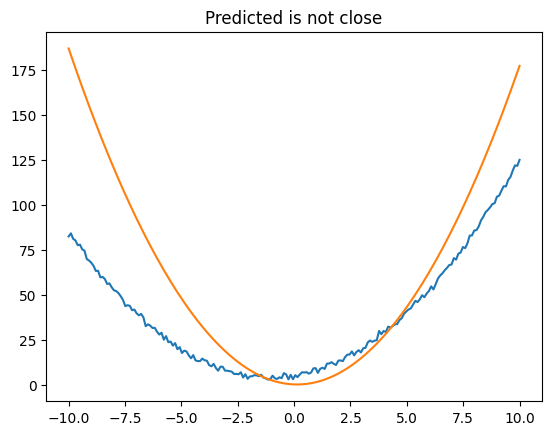

In [24]:
class Model:
    def __init__(self, params):
        self.params = params
        
    def __call__(self, x):
        return self.params[0] * (x ** 2) + self.params[1] * x + self.params[2]

def plot_initial_model():
    model = Model(random((3,)))
    xs, ys = gen_kinda_quadratic_data()
    plt.plot(xs, ys, label='Initial data')
    plt.plot(xs, model(xs), label='Predicted data')
    plt.title('Predicted is not close')
    plt.show()

    
plot_initial_model()

params=[1.0728295  1.9772696  0.58067524]


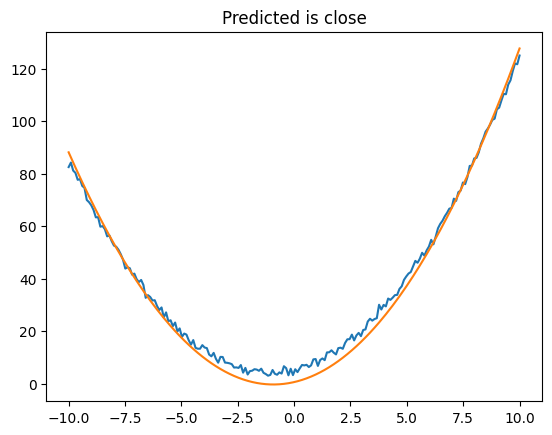

In [48]:
def calc_loss(params, xs, ys):
    model = Model(params)
    pred_ys = model(xs)
    return jnp.sum((ys - pred_ys) ** 2)


def train_and_plot():
    xs, ys = gen_kinda_quadratic_data()
    params = random((3,))
    learning_rate = 1e-6
    num_epochs = 300
    # gradient descent
    for _ in range(num_epochs):
        # grad does automatic differentiation with respect to first argument of the calc_loss
        # jax has a functional API, where grad takes a function and produces another function
        g_fn = grad(calc_loss)
        g = g_fn(params, xs, ys)
        params -= learning_rate * g
    print(f'params={params}')
    plt.plot(xs, ys, label='Initial data')
    plt.plot(xs, Model(params)(xs), label='Predicted data')
    plt.title('Predicted is close')
    plt.show()
        
train_and_plot()
        